In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib as mpl
from timeit import default_timer as timer

In [2]:
#Dimension of lattice
lx = 20
ly = 20

#fraction of different variants and of unoccupied spots
fa = 0.2
fb = 0.3
f0 = 1 - (fa + fb)

if fa + fb > 1:
    print('ERROR: Total fraction larger than 1')
    exit()

#go through each element in the lattice, to assign if element is Race A,B or vacant
#Race B: 1, Race A: -1, Vacant spot: 0
model = np.random.choice([-1, 0, 1], (lx,ly), p = [fa, f0, fb])

In [3]:
model

array([[ 1,  0,  0,  0, -1, -1, -1, -1,  1,  0,  0, -1,  0,  1,  1,  0,
        -1,  0,  0,  0],
       [ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  0, -1,  1,  1, -1,  1,
        -1,  1, -1,  1],
       [ 1,  0,  1,  0,  0,  0,  1,  0,  1,  0, -1, -1,  0, -1, -1,  0,
         1,  0,  1, -1],
       [ 1, -1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0, -1,  0, -1,  0,
         0,  0,  1, -1],
       [ 0, -1,  1,  1,  1, -1, -1, -1,  0, -1,  0,  0,  0,  0,  1,  0,
         0,  0,  1,  0],
       [-1,  0,  0,  1,  0,  1,  1,  0,  0, -1,  1,  0,  0,  1,  0,  0,
        -1, -1,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,
         0,  0,  1,  0],
       [-1,  0,  0,  1,  1,  0,  1, -1,  1,  0,  0,  0, -1,  0,  0,  0,
         0,  1,  0,  0],
       [-1,  0,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  1, -1,
         1,  1,  0, -1],
       [-1,  0, -1,  1,  0,  1,  1,  0, -1,  1,  0, -1, -1,  0,  1,  1,
         1, -1,  0,  1],
       [ 0,  0,  0,  0,  0,  0

In [4]:
start = timer()
counter = 0
fig = plt.figure()
#norm = mpl.colors.Normalize(vmin=5, vmax=10)
frames = [] # for storing the generated images
nA_list = []
nB_list = []

while True:
    counter += 1
    
    #creating the movie
    # frame    = plt.imshow(model, cmap=cm.bwr,animated=True, vmin = -1, vmax = 1)
    # frames.append([frame])
    #frames.append([plt.imshow(model, cmap=cm.bwr,animated=True)])
    #plt.imshow(model, animation = True)
    #plt.show()

    test = model.flatten().tolist()
    #check if one mutation has been fixated, so now we either no longer have variant A or B in population
    if 1 not in test or -1 not in test:
        n_vacant = lx*ly - np.count_nonzero(model)     #count vacant states
        nb = test.count(1)            #count states with variant B
        na = test.count(-1)           #count states with variant A
        
    
        print('One-race state reached')
        print('vacant = ' + str(n_vacant))
        print('A = ' + str(na))
        print('B = ' + str(nb))
        print()
        break
        
    #count number of A and B elements
    nA = (model.flatten()==-1).sum()
    nB = (model.flatten()==1).sum()
    
    nB_list.append(nB)
    nA_list.append(nA)
    
    #relative fitness of A
    r = 1.05

    #A's prob to reproduce (more advantage than B)
    ra = r*nA/(r*nA + nB)
    #B's prob. to reproduce
    rb = nB/(r*nA + nB)

    #A's prob to die
    da = nA/(nA + nB)
    #B's prob. to die
    db = nB/(nA + nB)

    if da > 1 or da < 0 or db > 1 or db < 0:
        print('ERROR: Death prob not physical')
        exit()
    if ra > 1 or ra < 0 or rb > 1 or rb < 0:
        print('ERROR: Survival prob not physical')
        exit()
    

    #uniform distribution to use as comparison of conditions
    prob_matrix = np.random.random((lx,ly))

    #find indices all vacant spots
    zeros = np.argwhere(model == 0)
    

    #choose 1 element from the state to die
    i = np.random.randint(0,lx) 
    j = np.random.randint(0,ly) 
    
    if model[i,j] == 1: #if occupied by B, and if condition is met, eliminate B

        if prob_matrix[i,j] <= db:
            model[i,j] = 0
            
    elif model[i,j] == -1: #if occupied by A, and if condition is met, eliminate A

        if prob_matrix[i,j] <= da:
            model[i,j] = 0
            
    else:
        pass

    #choose 1 element from the state to reproduce and if it reproduces, choose closest vacant spot to put new element
    i = np.random.randint(0,lx) 
    j = np.random.randint(0,ly) 
    #find distances of all zeros from reference point 
    #gives for each zero the distance to the choosen element to reproduce
    dist = np.sum((zeros-[i,j])**2, axis=1) #dist will throw an empty array if there are no more zeros (no more vacant spots)

    if dist.size > 0:

        #select point with minimum distance
        index = np.argmin(dist)
        #apply condition
        
        if model[i,j] == 1: #if occupied by B, and if condition is met, reproduce B and place in closest vacant spot
            if prob_matrix[i,j] <= rb:
                model[zeros[index][0], zeros[index][1]] = 1
        elif model[i,j] == -1: #if occupied by A, and if condition is met, reproduce A and place in closest vacant spot
            if prob_matrix[i,j] <= ra:
                model[zeros[index][0], zeros[index][1]] = 1
        else:
            pass
    
    
print('counter:', counter)

# ani = animation.ArtistAnimation(fig, frames,interval=200, blit=True,
#                                 repeat_delay=1000)

# ani.save("test_01.mp4")
# plt.show()

end = timer()

One-race state reached
vacant = 323
A = 0
B = 77

counter: 19657


<Figure size 640x480 with 0 Axes>

In [5]:
#time elapsed in seconds
print(end-start)

1.4315053597092628


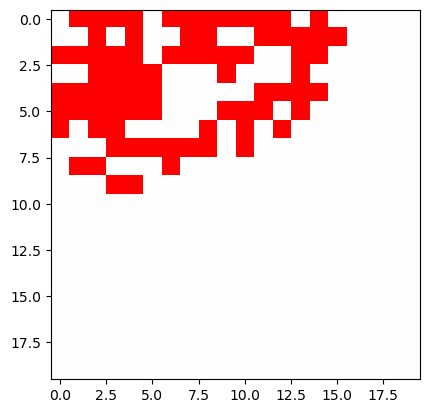

In [6]:
#final plot: shows fixation because we only have type B left
plt.imshow(model, cmap=cm.bwr, vmin = -1, vmax = 1)
plt.show()

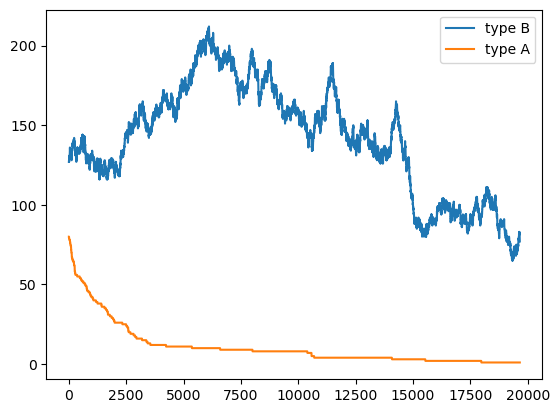

In [7]:
plt.plot(np.arange(1, counter), nB_list, label="type B")
plt.plot(np.arange(1, counter), nA_list, label="type A")
plt.legend()
plt.show()